# Big Bang in T3 Gowdy Cosmological Models by Quevedo
##  Geoff Cope
##  Univeristy of Utah
##  December 29, 2021 

Here we derive the field equations for metric 11

https://core.ac.uk/download/pdf/25309545.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols('t rho phi z dt drho dphi dz')

In [6]:
psi = Function('psi')(rho,z)
psi

In [4]:
omega = Function('omega')(rho,z)
omega

In [5]:
gamma = Function('gamma')(rho,z)
gamma

In [7]:
variables = Matrix([t,rho,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix([dt,drho,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = expand( - exp(2*psi) * (dt + omega * dphi)**2 + exp(-2*psi) * ( exp(2*gamma) * ( drho**2 + dz**2 ) + rho**2 * dphi**2 ) )
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡      2⋅ψ(ρ, z)                                                2⋅ψ(ρ, z)                   
⎢    -ℯ                         0                     -ω(ρ, z)⋅ℯ                            
⎢                                                                                           
⎢                      2⋅γ(ρ, z)  -2⋅ψ(ρ, z)                                                
⎢         0           ℯ         ⋅ℯ                             0                            
⎢                                                                                           
⎢          2⋅ψ(ρ, z)                           2  -2⋅ψ(ρ, z)    2        2⋅ψ(ρ, z)          
⎢-ω(ρ, z)⋅ℯ                     0             ρ ⋅ℯ           - ω (ρ, z)⋅ℯ                   
⎢                                                                                           
⎢                                                                                    2⋅γ(ρ, 
⎣         0                     0                              0      

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡      2⋅ψ(ρ, z)                                                2⋅ψ(ρ, z)                   
⎢    -ℯ                         0                     -ω(ρ, z)⋅ℯ                            
⎢                                                                                           
⎢                      2⋅γ(ρ, z)  -2⋅ψ(ρ, z)                                                
⎢         0           ℯ         ⋅ℯ                             0                            
⎢                                                                                           
⎢          2⋅ψ(ρ, z)                           2  -2⋅ψ(ρ, z)    2        2⋅ψ(ρ, z)          
⎢-ω(ρ, z)⋅ℯ                     0             ρ ⋅ℯ           - ω (ρ, z)⋅ℯ                   
⎢                                                                                           
⎢                                                                                    2⋅γ(ρ, 
⎣         0                     0                              0      

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                                                                      4⋅ψ(
⎢⎢                                                                             ω(ρ, z)⋅ℯ    
⎢⎢                                                               ∂                          
⎢⎢                     0                                         ──(ψ(ρ, z)) + ─────────────
⎢⎢                                                               ∂ρ                         
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                       4⋅ψ(ρ, z) ∂                                                        
⎢⎢              ω(ρ, z)⋅ℯ         ⋅──(ω(ρ, z))                                              
⎢⎢∂                                ∂ρ                                                       
⎢⎢──(ψ(ρ, z)) + ──────────────────────────────                        

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                ⎛          
⎢                                                                                ⎜          
⎢                                                                                ⎜     2    
⎢                                                                                ⎜ 2  ∂     
⎢                                                                                ⎜ρ ⋅───(ψ(ρ
⎢                                                                                ⎜     2    
⎢                                                                                ⎝   ∂ρ     
⎢                                                                                ───────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

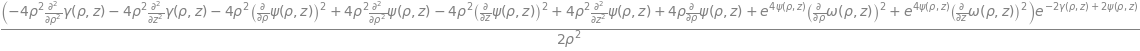

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                    ⎛      
⎢                                                                                    ⎜      
⎢                                                                                    ⎜     2
⎢                                                                                    ⎜ 2  ∂ 
⎢                                                                                    ⎜ρ ⋅───
⎢                                                                                    ⎜     2
⎢                                                                                    ⎝   ∂ρ 
⎢                                                                                    ───────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                ⎛          
⎢                                                                                ⎜          
⎢                                                                                ⎜     2    
⎢                                                                                ⎜ 2  ∂     
⎢                                                                                ⎜ρ ⋅───(ψ(ρ
⎢                                                                                ⎜     2    
⎢                                                                                ⎝   ∂ρ     
⎢                                                                                ───────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [29]:
einsteinSimplifed = simplify(einst.tensor())
einsteinSimplifed

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

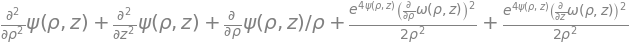

In [35]:
equation12 = expand((1/rho**2)*ricciSimplified[0,0].args[1])
equation12

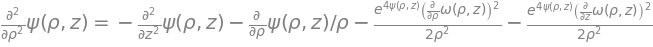

In [41]:
d2PsidRho2 = Eq(diff(psi,rho,rho), expand(solve( equation12 , diff(psi,rho,rho) )[0] ))
d2PsidRho2

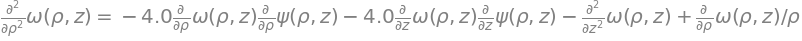

In [91]:
equation13 = Eq( diff(omega,rho,rho), solve( simplify(expand(einsteinSimplifed[0,2] - omega*collect(expand(einsteinSimplifed[0,2]),omega).coeff(omega))).args[1], diff(omega,rho,rho) )[0])
equation13 

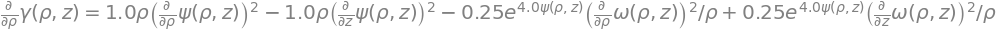

In [100]:
equation14  = expand(Eq(diff(gamma,rho)  , solve( einsteinSimplifed[3,3] , diff(gamma,rho) )[0] ) )
equation14

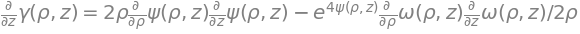

In [99]:
equation15 = Eq(diff(gamma,z),  solve( ricciSimplified[1,3] , diff(gamma,z) )[0] ) 
equation15

In [101]:
vacuumFieldEquations = Matrix([equation12,equation13,equation14,equation15])
vacuumFieldEquations

⎡                                                                                 2         
⎢                                           ∂              4⋅ψ(ρ, z) ⎛∂          ⎞     4⋅ψ(ρ
⎢               2              2            ──(ψ(ρ, z))   ℯ         ⋅⎜──(ω(ρ, z))⎟    ℯ     
⎢              ∂              ∂             ∂ρ                       ⎝∂ρ         ⎠          
⎢             ───(ψ(ρ, z)) + ───(ψ(ρ, z)) + ─────────── + ───────────────────────── + ──────
⎢               2              2                 ρ                      2                   
⎢             ∂ρ             ∂z                                      2⋅ρ                    
⎢                                                                                           
⎢                                                                                           
⎢            2                                                                            2 
⎢           ∂                   ∂           ∂                 ∂       